### Contexto
O que é Credit Scoring

O Credit Score é uma medição feita por bancos ou financeiras para medir os riscos em conceder algum crédito, analisando o histórico da pessoa que pediu emprestado.

Esta pontuação de crédito é utilizada para perceber se o tomador de crédito possar ser um potencial inadimplente no reembolso do dinheiro emprestado.

Como funciona o Credit Scoring

Para analisar o credit score, os bancos ou financeiras utilizam uma base de dados do tomador de crédito que envolvem os dados pessoais e os rendimentos mensais, além de protestos, ações judiciais ou outras dívidas em aberto.

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTEN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [63]:
dataset = pd.read_csv('clean_data.csv')
dataset.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [65]:
dataset['Age'] = dataset['Age'].astype(np.int64)
dataset['Years_employed'] = dataset['Years_employed'].astype(np.int64)

In [66]:
dataset.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
ID,9709.0,5076104.679,40802.696,5008804.0,5036955.0,5069449.0,5112986.0,5150479.0
Gender,9709.0,0.349,0.477,0.0,0.0,0.0,1.0,1.0
Own_car,9709.0,0.368,0.482,0.0,0.0,0.0,1.0,1.0
Own_property,9709.0,0.672,0.470,0.0,0.0,1.0,1.0,1.0
Work_phone,9709.0,0.217,0.413,0.0,0.0,0.0,0.0,1.0
Phone,9709.0,0.288,0.453,0.0,0.0,0.0,1.0,1.0
Email,9709.0,0.088,0.283,0.0,0.0,0.0,0.0,1.0
Unemployed,9709.0,0.175,0.380,0.0,0.0,0.0,0.0,1.0
Num_children,9709.0,0.423,0.767,0.0,0.0,0.0,1.0,19.0
Num_family,9709.0,2.183,0.933,1.0,2.0,2.0,3.0,20.0


relação de aprovados e não aprovados com o numero de filhos

In [67]:
ch_ap = dataset.value_counts(subset=['Num_children', 'Target'])

In [68]:
ch_ap.sort_index()

Num_children  Target
0             0         5941
              1          878
1             0         1627
              1          259
2             0          722
              1          130
3             0          112
              1           14
4             0           17
              1            1
5             0            5
7             1            1
14            0            1
19            0            1
dtype: int64

relação de aprovados e não aprovados com o gênero

In [69]:
dataset.value_counts(subset=['Gender', 'Target']).sort_index()

Gender  Target
0       0         5511
        1          812
1       0         2915
        1          471
dtype: int64

relação de aprovados e não aprovados com a idade

In [70]:
age_min = dataset['Age'].min()
rotulos = ['jovem', 'adulto', 'idoso']
classes = [age_min, 29, 59, np.inf]

In [71]:
dataset['Age_class'] = pd.cut(x=dataset['Age'], bins=classes, labels=rotulos, include_lowest=True)

In [72]:
dataset.value_counts(subset=['Age_class', 'Target']).sort_index()

Age_class  Target
jovem      0         1140
           1          210
adulto     0         6375
           1          963
idoso      0          911
           1          110
dtype: int64

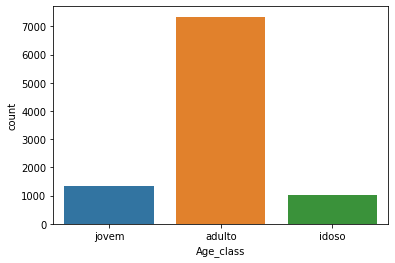

In [73]:
sns.countplot(x='Age_class', data=dataset)

Preparando os dados para algoritmos de machine learning

In [74]:
cat = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']
dataset[cat]

,Income_type,Education_type,Family_status,Housing_type,Occupation_type
0,Working,Higher education,Civil marriage,Rented apartment,Other
1,Working,Secondary / secondary special,Married,House / apartment,Security staff
2,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
3,Pensioner,Higher education,Separated,House / apartment,Other
4,Working,Higher education,Married,House / apartment,Accountants
...,...,...,...,...,...
9704,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers
9705,Commercial associate,Secondary / secondary special,Married,House / apartment,Other
9706,Working,Secondary / secondary special,Married,House / apartment,Other
9707,Pensioner,Higher education,Married,House / apartment,Medicine staff


In [75]:
for c in cat:
  print(f"{c} ---> {','.join(dataset[c].unique())}")

Income_type ---> Working,Commercial associate,Pensioner,State servant,Student
Education_type ---> Higher education,Secondary / secondary special,Incomplete higher,Lower secondary,Academic degree
Family_status ---> Civil marriage,Married,Single / not married,Separated,Widow
Housing_type ---> Rented apartment,House / apartment,Municipal apartment,With parents,Co-op apartment,Office apartment
Occupation_type ---> Other,Security staff,Sales staff,Accountants,Laborers,Managers,Drivers,Core staff,High skill tech staff,Cleaning staff,Private service staff,Cooking staff,Low-skill Laborers,Medicine staff,Secretaries,Waiters/barmen staff,HR staff,Realty agents,IT staff


diminuindo as classes de algumas variaveis

In [76]:
f_status = {
    'Married': 'Married',
    'Civil marriage': 'Married',
    'Single / not married': 'Single',
    'Separated': 'Single',
    'Widow': 'Single'
}

h_type = {
    'Rented apartment': 'not_owner',
    'House / apartment': 'owner',
    'Municipal apartment': 'not_owner',
    'With parents': 'not_owner',
    'Co-op apartment': 'not_owner',
    'Office apartment': 'not_owner'
}

dataset['Family_status'] = dataset['Family_status'].map(f_status)
dataset['Housing_type'] = dataset['Housing_type'].map(h_type)

In [77]:
dataset.drop(labels=['ID', 'Age_class'], axis=1, inplace=True)

In [78]:
x_train, x_test = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['Target'])

In [79]:
dataset['Target'].value_counts() / dataset.shape[0]

0    0.867855
1    0.132145
Name: Target, dtype: float64

In [80]:
x_train['Target'].value_counts() / x_train.shape[0]

0    0.867903
1    0.132097
Name: Target, dtype: float64

In [81]:
y_train = x_train['Target']

codificando variaveis com OneHotEncoder

In [82]:
num = ['Total_income']
cat = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

In [83]:
standard = StandardScaler()
one_encoder = OneHotEncoder()

full_pipeline = ColumnTransformer([
                                   ('numeric', standard, num),
                                   ('one_hot', one_encoder, cat)
])
x_train_one_hot = full_pipeline.fit_transform(x_train)
x_train_one_hot = x_train_one_hot.toarray()

avaliando modelos de ML

Base line

In [84]:
def metrics(real, predict):
  matrix_confusion = confusion_matrix(real, predict)
  ax = sns.heatmap(matrix_confusion, annot=True, fmt='d')
  ax.set_ylabel('Real', fontsize=14)
  ax.set_xlabel('Previsto', fontsize=14)
  print(f'Precisão: {precision_score(real, predict)}')
  print(f'Revocação: {recall_score(real, predict)}')
  print(f'f1-score: {f1_score(real, predict)}')

In [85]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(x_train_one_hot, y_train)
dummy.score(x_train_one_hot, y_train)

0.7748165314793356

In [86]:
scores = cross_val_score(dummy, x_train_one_hot, y_train, cv=5)
print(scores.mean())

0.7645179629081755


Precisão: 0.1287223823246878
Revocação: 0.13060428849902533
f1-score: 0.12965650701499756


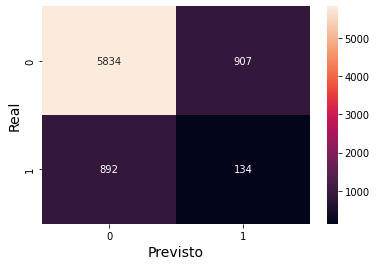

In [87]:
predicts = cross_val_predict(dummy, x_train_one_hot, y_train, cv=5)
metrics(y_train, predicts)

Arvore de decisão

In [88]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth':[5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

gridcv = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
gridcv.fit(x_train_one_hot, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]})

In [89]:
gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [90]:
gridcv.best_score_

0.8679027017082394

algo interessante de observar é que o score obtido pela acurácia trás um valor alto, isso é da natureza da acurácia. antes de tomar alguma decisão é importante observar outras métricas como a precisão e a revocação.

Precisão: 0.5
Revocação: 0.0029239766081871343
f1-score: 0.005813953488372093


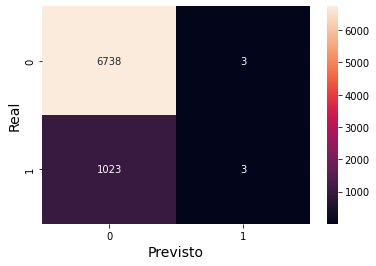

In [91]:
best_model = gridcv.best_estimator_
predict_tree = cross_val_predict(best_model, x_train_one_hot, y_train, cv=5)
metrics(y_train, predict_tree)

o f1-score  é a média harmônica da precisão e revocação

um detalhe interessante é que há um desequilibrio entre as classes, isso pode ter influenciado negativamente o resultado. vou ajustar isso

dados originais

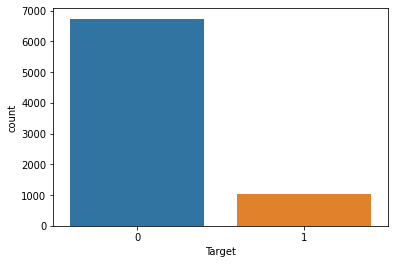

In [92]:
sns.countplot(x=y_train)

geracão de registros sintéticos

In [93]:
sm = SMOTEN(sampling_strategy=0.6, random_state=42)
x_resample, y_resample = sm.fit_resample(x_train, y_train)

dados após a geração de dados sintéticos

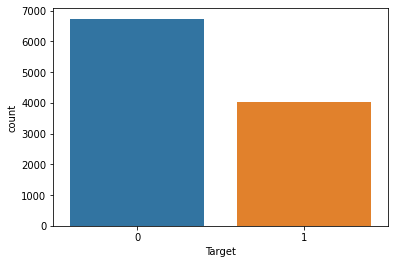

In [94]:
sns.countplot(x=y_resample)

In [95]:
standard = StandardScaler()
one_encoder = OneHotEncoder()

full_pipeline = ColumnTransformer([
                                   ('numeric', standard, num),
                                   ('one_hot', one_encoder, cat)
])
x_train_one_hot_resample = full_pipeline.fit_transform(x_resample)
x_train_one_hot_resample = x_train_one_hot_resample.toarray()

In [96]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth':[31, 35, 37, 41],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

gridcv = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='f1')
gridcv.fit(x_train_one_hot_resample, y_resample)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [31, 35, 37, 41],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]},
             scoring='f1')

In [97]:
gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 31,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [98]:
gridcv.best_score_

0.5998446009289022

Precisão: 0.6105420934299276
Revocação: 0.6043521266073195
f1-score: 0.6074313408723748


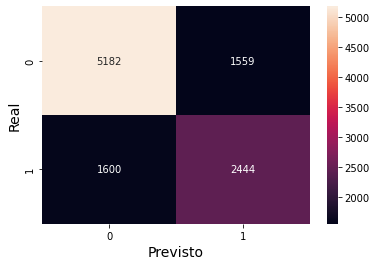

In [99]:
best_model = gridcv.best_estimator_
predict_tree = cross_val_predict(best_model,x_train_one_hot_resample, y_resample, cv=5)
metrics(y_resample, predict_tree)

importancia das variaveis

In [100]:
def features_importance(grid, pipeline):
  cat_labels = []
  features_importance = grid.best_estimator_.feature_importances_
  cat_encoder = pipeline.named_transformers_['one_hot']
  cat_encoder.categories_
  colum_labels = list(x_train.columns[:13])
  for i in list(cat_encoder.categories_):
    for a in i:
      cat_labels.append(a)
  colum_labels.extend(cat_labels)
  return sorted(zip(features_importance, colum_labels), reverse=True)

In [101]:
pprint(features_importance(gridcv, full_pipeline))

[(0.420497978773301, 'Gender'),
 (0.06501056995586527, 'Years_employed'),
 (0.04861540171779254, 'Total_income'),
 (0.04379988594811545, 'Num_children'),
 (0.03998637147210732, 'Email'),
 (0.03362359478664546, 'Accountants'),
 (0.03104392967553799, 'Own_car'),
 (0.0303170139842943, 'Num_family'),
 (0.02817596829925143, 'Academic degree'),
 (0.027795714529838398, 'Married'),
 (0.027794440232098438, 'not_owner'),
 (0.02582492435844011, 'Own_property'),
 (0.02284866582813522, 'Work_phone'),
 (0.018862047949172577, 'Pensioner'),
 (0.01836363329461793, 'State servant'),
 (0.017420821369023363, 'Core staff'),
 (0.014418546633109508, 'Higher education'),
 (0.01344698640336015, 'Lower secondary'),
 (0.012743249119578954, 'Commercial associate'),
 (0.011755450668413927, 'Working'),
 (0.01025848983705614, 'owner'),
 (0.009435305234588931, 'Account_length'),
 (0.007995735869092848, 'HR staff'),
 (0.006602755348141732, 'Student'),
 (0.003247457165034694, 'Cleaning staff'),
 (0.0028047683410415995,

variaveis que não serão removidas:
*   Gender
*   Own_property
*   Age
*   Housing_type
*   Family_status
*   Work_phone
*   Years_employed
*   Num_children
*   Education_type
*   Total_income
*   Occupation_type
*   Account_length
















Removendo variaveis

In [102]:
drop = ['Own_car', 'Phone', 'Email', 'Unemployed', 'Num_family', 'Income_type']
x_train_removed = x_train.drop(labels=drop, axis=1)

criando variaveis sintéticas

In [103]:
sm = SMOTEN(sampling_strategy=0.6, random_state=42)
x_resample, y_resample = sm.fit_resample(x_train_removed, y_train)

fazendo transformações

In [104]:
standard = StandardScaler()
one_encoder = OneHotEncoder()

num = ['Total_income']
cat = ['Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

full_pipeline = ColumnTransformer([
                                   ('numeric', standard, num),
                                   ('one_hot', one_encoder, cat)
])

x_train_one_hot_limp = full_pipeline.fit_transform(x_resample)
x_train_one_hot_limp = x_train_one_hot_limp.toarray()

Arvore de decisão

In [105]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth':[27, 31, 35, 39],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

gridcv_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='f1')
gridcv_tree.fit(x_train_one_hot_limp, y_resample)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [27, 31, 35, 39],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]},
             scoring='f1')

In [106]:
gridcv_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 31,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [107]:
gridcv_tree.best_score_

0.5848634259406179

Precisão: 0.6008146639511202
Revocação: 0.5835806132542037
f1-score: 0.5920722528850978


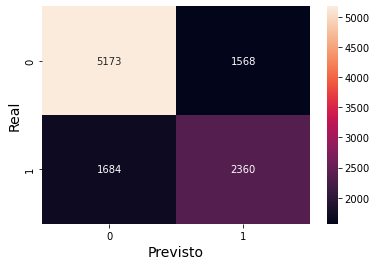

In [108]:
best_model_tree = gridcv_tree.best_estimator_
predict_tree = cross_val_predict(best_model_tree, x_train_one_hot_limp, y_resample, cv=5)
metrics(y_resample, predict_tree)

In [109]:
def roc_auc(model, x, y):
  predict_proba = cross_val_predict(model, x, y, cv=5, method='predict_proba')
  fpr, tpr, thr = roc_curve(y, predict_proba[:,1])
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.show()
  print(f'AUC: {roc_auc_score(y, predict_proba[:,1])}')

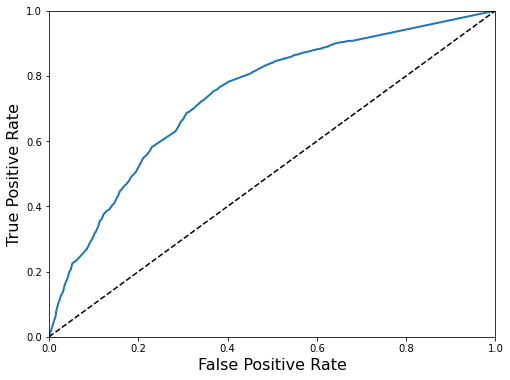

AUC: 0.7374991581257702


In [110]:
roc_auc(best_model_tree, x_train_one_hot_limp, y_resample)

KNN

In [111]:
params = {
    'n_neighbors': [1, 2, 3, 4],
    'p':[1,2]
}

gridcv_knn = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='f1')
gridcv_knn.fit(x_train_one_hot_limp, y_resample)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4], 'p': [1, 2]},
             scoring='f1')

In [112]:
gridcv_knn.best_score_

0.5011680234310336

In [113]:
gridcv_knn.best_params_

{'n_neighbors': 4, 'p': 2}

Precisão: 0.608010955152345
Revocação: 0.4391691394658754
f1-score: 0.5099784637473079


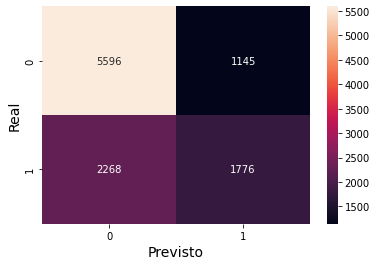

In [114]:
best_model_knn = gridcv_knn.best_estimator_
predict_knn = cross_val_predict(best_model_knn, x_train_one_hot_limp, y_resample, cv=5)
metrics(y_resample, predict_knn)

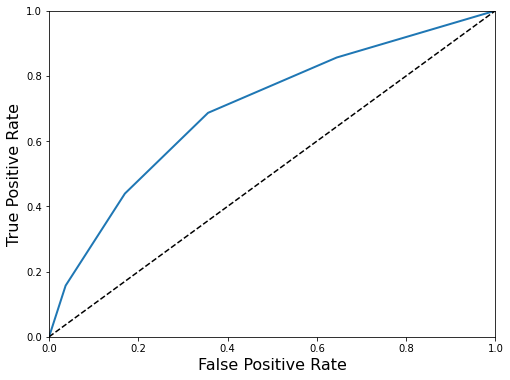

AUC: 0.6997967103003293


In [115]:
roc_auc(best_model_knn, x_train_one_hot_limp, y_resample)

avaliando o melhor modelo no conjunto de teste

In [116]:
drop = ['Own_car', 'Phone', 'Email', 'Unemployed', 'Num_family', 'Income_type', 'Target']
x_test_limp = x_test.drop(labels=drop, axis=1)
y_test = x_test['Target']

In [117]:
x_test_prepared = full_pipeline.transform(x_test_limp).toarray()

In [118]:
y_test_predict = best_model_tree.predict(x_test_prepared)

Precisão: 0.1194331983805668
Revocação: 0.22957198443579765
f1-score: 0.15712383488681758


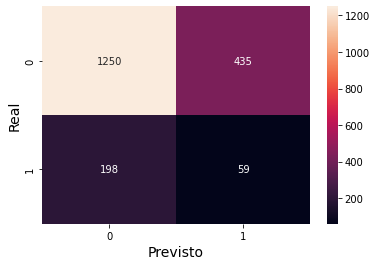

In [119]:
metrics(y_test, y_test_predict)

o modelo não se saiu bem com os dados de teste. devo voltar para o inicio e tentar melhorar os ajustes